In [13]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import models
import os
from tensorflow.keras.preprocessing.image import *
from sklearn.metrics import *


In [6]:
base_dir = os.path.expanduser("/mnt/d/BDA602/FruitsVegetables/test")

test = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

Found 359 files belonging to 36 classes.


In [7]:
x_test, y_test = next(iter(test))

x_test = tf.cast(x_test, 'float32') / 255.0

y_test_one_hot = to_categorical(y_test, 36)

2024-04-23 10:04:59.744793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-23 10:05:00.875673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [8]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [10]:
test_generator = test_datagen.flow_from_directory(
        base_dir, 
        target_size= (224, 224),
        batch_size = 36,
        color_mode= "rgb",
        class_mode= "categorical")

Found 359 images belonging to 36 classes.


In [60]:
VGG16 = load_model('/mnt/d/BDA602/VGG16.keras')
DenseNet121 = load_model('/mnt/d/BDA602/DenseNet121.keras')
InceptionV3 = load_model('/mnt/d/BDA602/InceptionV3.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


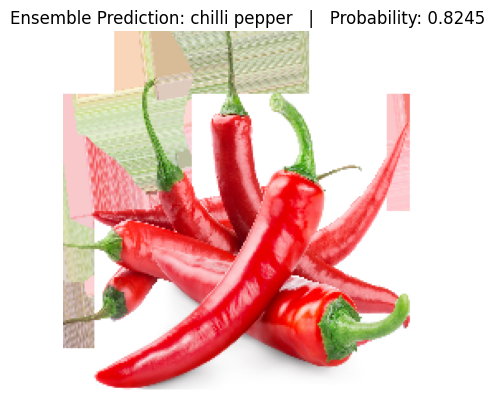

Individual Model Predictions:
VGG16 Prediction: peas, Probability: 0.1690
DenseNet121 Prediction: chilli pepper, Probability: 0.7666
InceptionV3 Prediction: chilli pepper, Probability: 0.8245


In [109]:
random_index = np.random.randint(len(x_test))

random_image = x_test[random_index]

random_image = np.expand_dims(random_image, axis=0)

pred_probs_VGG16 = VGG16.predict(random_image)
pred_probs_DenseNet121 = DenseNet121.predict(random_image)
pred_probs_InceptionV3 = InceptionV3.predict(random_image)

ensemble_pred = np.maximum.reduce([pred_probs_VGG16, pred_probs_DenseNet121, pred_probs_InceptionV3])

predicted_label = np.argmax(ensemble_pred)

pred_prob = ensemble_pred[0][predicted_label]

class_names = test.class_names

plt.imshow(random_image.squeeze())
plt.title("Ensemble Prediction: {}   |   Probability: {:.4f}".format(class_names[predicted_label], pred_prob))
plt.axis('off')
plt.show()

print("Individual Model Predictions:")
print("VGG16 Prediction: {}, Probability: {:.4f}".format(class_names[np.argmax(pred_probs_VGG16)], pred_probs_VGG16.max()))
print("DenseNet121 Prediction: {}, Probability: {:.4f}".format(class_names[np.argmax(pred_probs_DenseNet121)], pred_probs_DenseNet121.max()))
print("InceptionV3 Prediction: {}, Probability: {:.4f}".format(class_names[np.argmax(pred_probs_InceptionV3)], pred_probs_InceptionV3.max()))

In [62]:
total_batches = len(test_generator)

ensemble_predicted_labels = []
ensemble_pred_probs = []
actual_labels = []

for i in range(total_batches):
    images, true_labels = test_generator[i]
    
    pred_probs_VGG16 = VGG16.predict(images)
    pred_probs_DenseNet121 = DenseNet121.predict(images)
    pred_probs_InceptionV3 = InceptionV3.predict(images)
    
    ensemble_preds = np.maximum.reduce([pred_probs_VGG16, pred_probs_DenseNet121, pred_probs_InceptionV3])
    predicted_labels = np.argmax(ensemble_preds, axis=1)
    pred_probs = np.max(ensemble_preds, axis=1)
    
    ensemble_predicted_labels.extend(predicted_labels)
    ensemble_pred_probs.extend(pred_probs)
    
    actual_label_indices = np.argmax(true_labels, axis=1)
    actual_labels.extend([class_names[idx] for idx in actual_label_indices])

ensemble_predicted_labels = np.array(ensemble_predicted_labels)
ensemble_pred_probs = np.array(ensemble_pred_probs)

actual_label_indices = np.array([class_names.index(label) for label in actual_labels])

individual_accuracies = ensemble_predicted_labels == actual_label_indices

ensemble_accuracy = np.mean(individual_accuracies)

print('Ensemble Model Accuracy:', ensemble_accuracy * 100, '%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


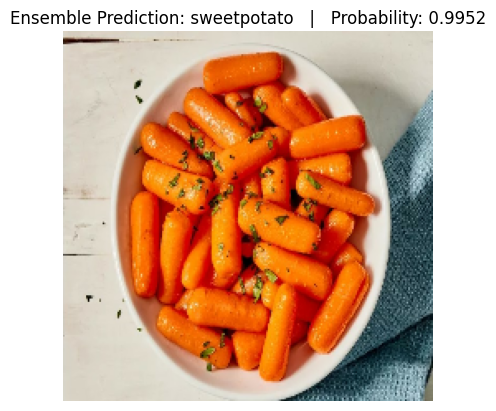

In [136]:
input_image_name = "/mnt/d/Image_test7_4.jpg"

input_image = tf.io.read_file(input_image_name)
image = tf.image.decode_image(input_image, channels=3)

image = tf.image.resize(image, size=(224, 224))

image = image / 255.0

image = tf.expand_dims(image, axis=0)

pred_probs_VGG16 = VGG16.predict(image)
pred_probs_DenseNet121 = DenseNet121.predict(image)
pred_probs_InceptionV3 = InceptionV3.predict(image)

ensemble_pred = np.maximum.reduce([pred_probs_VGG16, pred_probs_DenseNet121, pred_probs_InceptionV3])

predicted_label = np.argmax(ensemble_pred)
pred_prob = ensemble_pred[0][predicted_label]

class_names = test.class_names

plt.imshow(image.numpy().squeeze())
plt.title("Ensemble Prediction: {}   |   Probability: {:.4f}".format(class_names[predicted_label], pred_prob))
plt.axis('off')
save_dir = "/mnt/d"
save_file_name = "Image_test7_4.png"
save_path = os.path.join(save_dir, save_file_name)
plt.savefig(save_path)
plt.show()